# Measuring <font color='red'>Phenotype</font> in OpenSAFELY-TPP
This short report describes how <font color='red'>phenotype</font> can be identified in the OpenSAFELY-TPP database, and the strengths and weaknesses of the methods. This is a living document that will be updated to reflect changes to the OpenSAFELY-TPP database and the patient records within.

## OpenSAFELY
OpenSAFELY is an analytics platform for conducting analyses on Electronic Health Records inside the secure environment where the records are held. This has multiple benefits: 

* We don't transport large volumes of potentially disclosive pseudonymised patient data outside of the secure environments for analysis
* Analyses can run in near real-time as records are ready for analysis as soon as they appear in the secure environment
* All infrastructure and analysis code is stored in GitHub repositories, which are open for security review, scientific review, and re-use

A key feature of OpenSAFELY is the use of study definitions, which are formal specifications of the datasets to be generated from the OpenSAFELY database. This takes care of much of the complex EHR data wrangling required to create a dataset in an analysis-ready format. It also creates a library of standardised and validated variable definitions that can be deployed consistently across multiple projects. 

The purpose of this report is to describe all such variables that relate to <font color='red'>phenotype</font>, their relative strengths and weaknesses, in what scenarios they are best deployed. It will also describe potential future definitions that have not yet been implemented.

## Available Records
OpenSAFELY-TPP runs inside TPP’s data centre which contains the primary care records for all patients registered at practices using TPP’s SystmOne Clinical Information System. This data centre also imports external datasets from other sources, including A&E attendances and hospital admissions from NHS Digital’s Secondary Use Service, and death registrations from the ONS. More information on available data sources can be found within the OpenSAFELY documentation. 

In [1]:
from IPython.display import display, Markdown
from report_functions import *

In [2]:
### CONFIGURE OPTIONS HERE ###

# Import file
input_path = '../output/data/input_all.feather'

# Definitions
definitions = ['derived_bmi']

# Dates
date_min = '2019-01-01'
date_max = '2019-12-31'
time_delta = 'M'

# Min/max range
min_range = 4
max_range = 200

# Null value – 0 or NA
null = 0

# Covariates
demographic_covariates = ['age_band', 'sex', 'ethnicity', 'region', 'imd']
clinical_covariates = ['dementia', 'diabetes', 'hypertension', 'learning_disability']

In [3]:
# Preprocess data with configurations above
num_definitions = len(definitions)
df_occ = preprocess_data(input_path, definitions, demographic_covariates, clinical_covariates, date_min, date_max, time_delta, num_definitions, null)

_______
## Descriptive Statistics

### Occurrence

#### Unique Patients by Definition

In [4]:
count_unique(df_occ, definitions, time_delta, 'patient')

counts
pat_derived_bmi  20050.0
pat_all_filled   20050.0
pat_all_missing   4940.0

In [5]:
for group in demographic_covariates:
    count_unique(df_occ, definitions, time_delta, 'patient', group)

pat_derived_bmi  pat_all_filled  pat_all_missing
age_band                                                  
0-19               1385.0          1385.0            380.0
20-29              1380.0          1380.0            320.0
30-39              1285.0          1285.0            340.0
40-49              1290.0          1290.0            330.0
50-59              1470.0          1470.0            340.0
60-69              1480.0          1480.0            320.0
70-79              1355.0          1355.0            340.0
80+                1340.0          1340.0            350.0

pat_derived_bmi  pat_all_filled  pat_all_missing
sex                                                  
F             7385.0          7385.0           1755.0
M             7535.0          7535.0           1920.0

pat_derived_bmi pat_all_filled pat_all_missing
ethnicity                                               
1                  1085.0         1085.0           265.0
2                   480.0          480.0           145.0
3                   260.0          260.0            90.0
4                   150.0          150.0            35.0
5                   125.0          125.0            40.0
6                    35.0           35.0             5.0
7                       -              -               -
8                     5.0            5.0             5.0

pat_derived_bmi  pat_all_filled  pat_all_missing
region                                                                    
East Midlands                       690.0           690.0            160.0
East of England                     640.0           640.0            145.0
London                             1355.0          1355.0            350.0
North East                          665.0           665.0            205.0
North West                          690.0           690.0            185.0
South East                         1460.0          1460.0            375.0
West Midlands                       690.0           690.0            155.0
Yorkshire and the Humber            620.0           620.0            175.0

pat_derived_bmi  pat_all_filled  pat_all_missing
imd                                                  
100           2265.0          2265.0            535.0
200           2350.0          2350.0            575.0
300           2355.0          2355.0            605.0
400           2330.0          2330.0            640.0
500           2380.0          2380.0            575.0

In [6]:
for group in clinical_covariates:
    count_unique(df_occ, definitions, time_delta, 'patient', group)

pat_derived_bmi  pat_all_filled  pat_all_missing
dementia                                                  
False             19770.0         19770.0           4860.0
True                 95.0            95.0             30.0

pat_derived_bmi  pat_all_filled  pat_all_missing
diabetes                                                  
False             19745.0         19745.0           4875.0
True                105.0           105.0             15.0

pat_derived_bmi  pat_all_filled  pat_all_missing
hypertension                                                  
False                 19760.0         19760.0           4880.0
True                     95.0            95.0             25.0

pat_derived_bmi  pat_all_filled  pat_all_missing
learning_disability                                                  
False                        19735.0         19735.0           4865.0
True                            95.0            95.0             25.0

#### Unique Patients Over Time

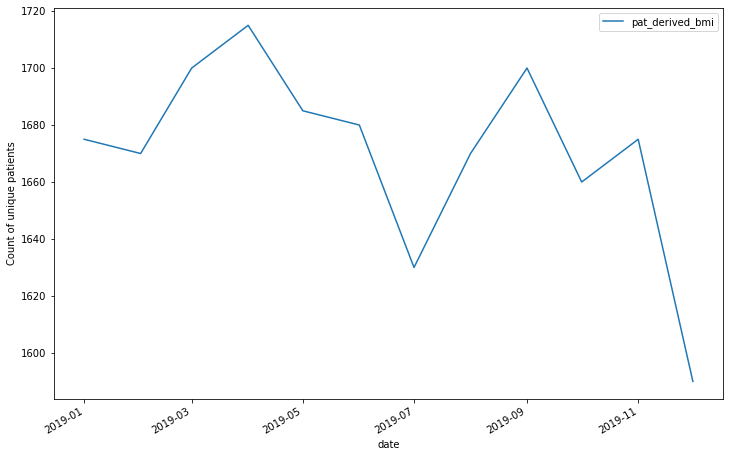

In [7]:
report_over_time(df_occ, definitions, 'patient')

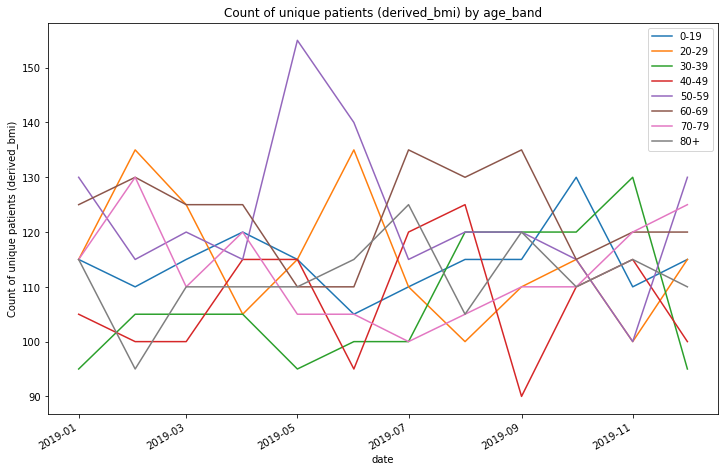

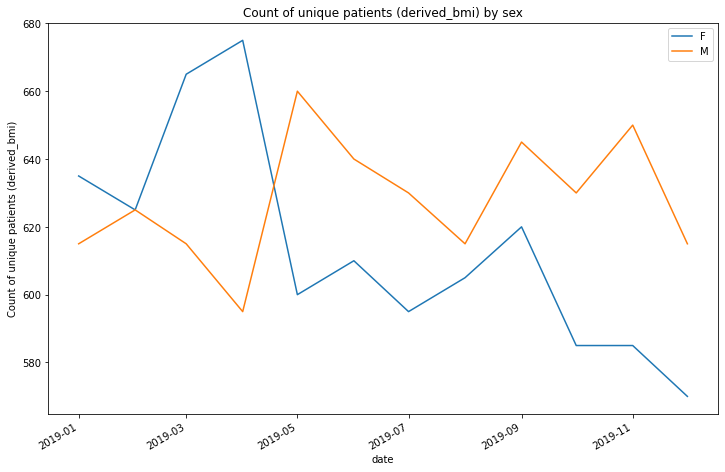

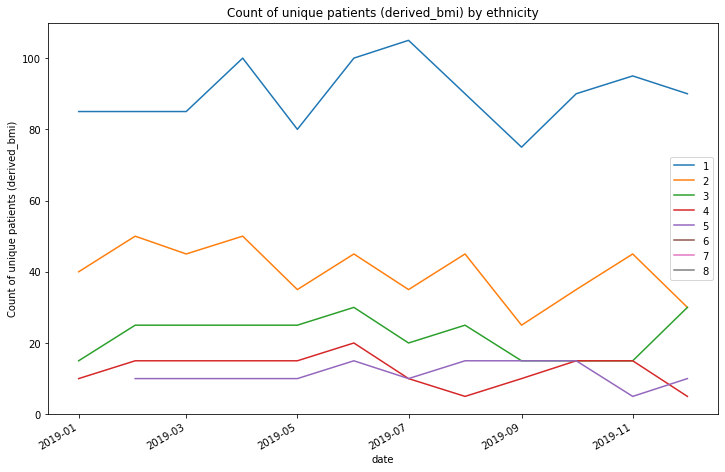

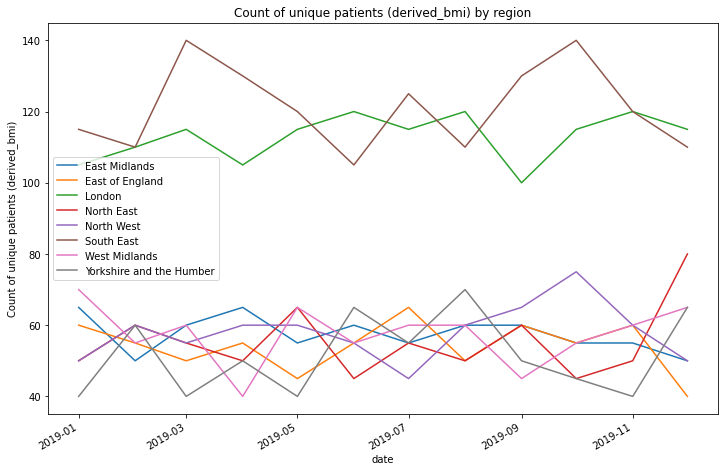

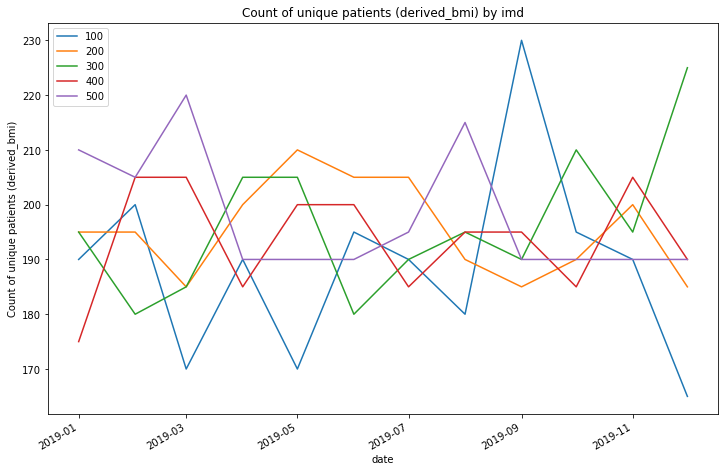

In [8]:
for group in demographic_covariates:
    report_over_time(df_occ, definitions, 'patient', group)

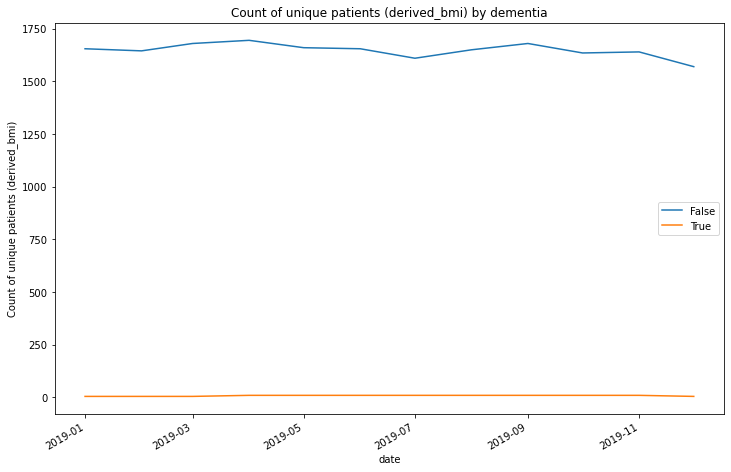

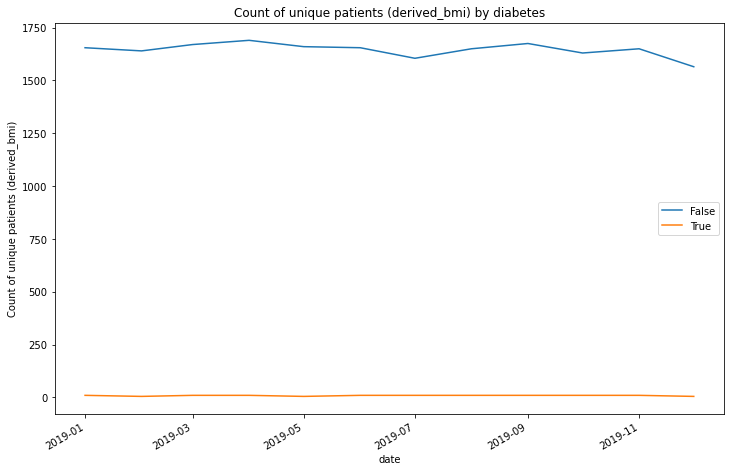

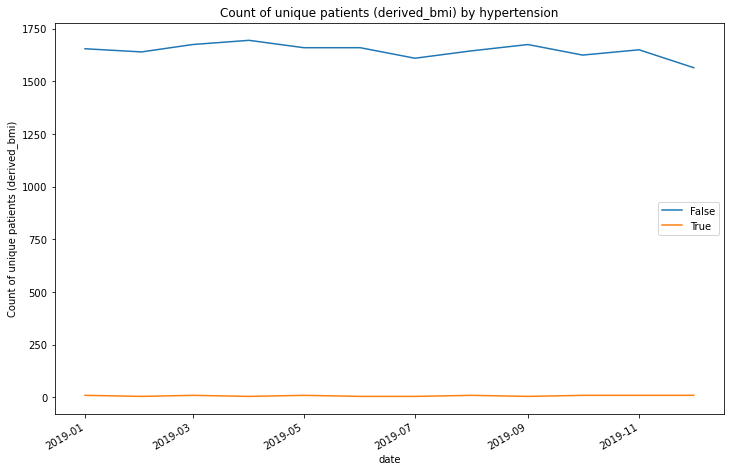

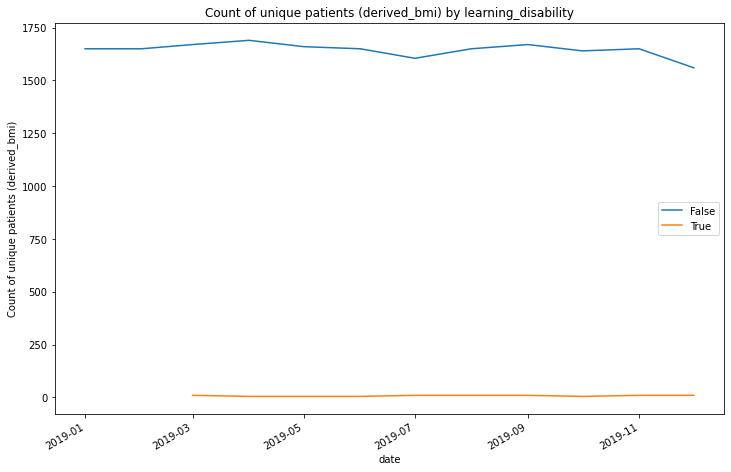

In [9]:
for group in clinical_covariates:
    report_over_time(df_occ, definitions, 'patient', group)

#### Unique Measurements by Definition

In [10]:
count_unique(df_occ, definitions, time_delta, 'measurement')

counts
meas_derived_bmi  9612000.0
meas_all_filled   9612000.0
meas_all_missing  2388000.0

In [11]:
for group in demographic_covariates:
    count_unique(df_occ, definitions, time_delta, 'measurement', group)

meas_derived_bmi  meas_all_filled  meas_all_missing
age_band                                                     
0-19              158125.0         158125.0           43510.0
20-29             151975.0         151975.0           36155.0
30-39             141405.0         141405.0           36155.0
40-49             135215.0         135215.0           35490.0
50-59             165115.0         165115.0           39145.0
60-69             165965.0         165965.0           35525.0
70-79             146415.0         146415.0           36585.0
80+               146015.0         146015.0           37380.0

meas_derived_bmi  meas_all_filled  meas_all_missing
sex                                                     
F           2381955.0        2381955.0          564330.0
M           2427815.0        2427815.0          630475.0

meas_derived_bmi meas_all_filled meas_all_missing
ethnicity                                                  
1                  27835.0         27835.0           7400.0
2                   5645.0          5645.0           1625.0
3                   1570.0          1570.0            575.0
4                    495.0           495.0            110.0
5                    265.0           265.0             70.0
6                     35.0            35.0                -
7                        -               -                -
8                      5.0             5.0                -

meas_derived_bmi  meas_all_filled  meas_all_missing
region                                                                       
East Midlands                      41790.0          41790.0            9795.0
East of England                    37575.0          37575.0            8405.0
London                            151275.0         151275.0           39335.0
North East                         41985.0          41985.0           12780.0
North West                         45000.0          45000.0           12015.0
South East                        172955.0         172955.0           44240.0
West Midlands                      44230.0          44230.0            9625.0
Yorkshire and the Humber           35720.0          35720.0            9850.0

meas_derived_bmi  meas_all_filled  meas_all_missing
imd                                                     
100          356840.0         356840.0           85075.0
200          388220.0         388220.0           95380.0
300          397345.0         397345.0           96990.0
400          386595.0         386595.0          104110.0
500          399895.0         399895.0           97755.0

In [12]:
for group in clinical_covariates:
    count_unique(df_occ, definitions, time_delta, 'measurement', group)

meas_derived_bmi  meas_all_filled  meas_all_missing
dementia                                                     
False            9424800.0        9424800.0         2336400.0
True                 920.0            920.0             280.0

meas_derived_bmi  meas_all_filled  meas_all_missing
diabetes                                                     
False            9412920.0        9412920.0         2348280.0
True                1040.0           1040.0             160.0

meas_derived_bmi  meas_all_filled  meas_all_missing
hypertension                                                     
False                9421830.0        9421830.0         2339370.0
True                     950.0            950.0             250.0

meas_derived_bmi  meas_all_filled  meas_all_missing
learning_disability                                                     
False                       9419850.0        9419850.0         2341350.0
True                            970.0            970.0             230.0

#### Unique Measurements Over Time

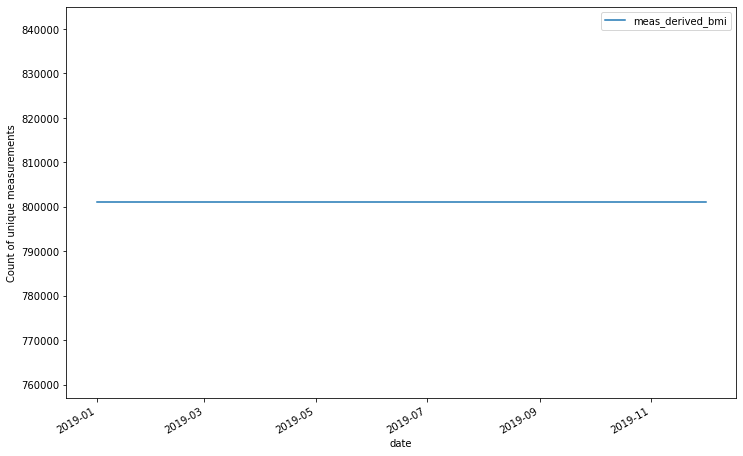

In [13]:
report_over_time(df_occ, definitions, 'measurement')

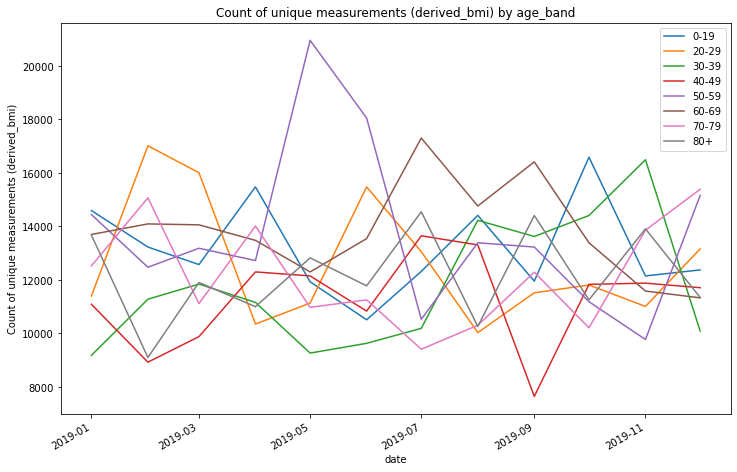

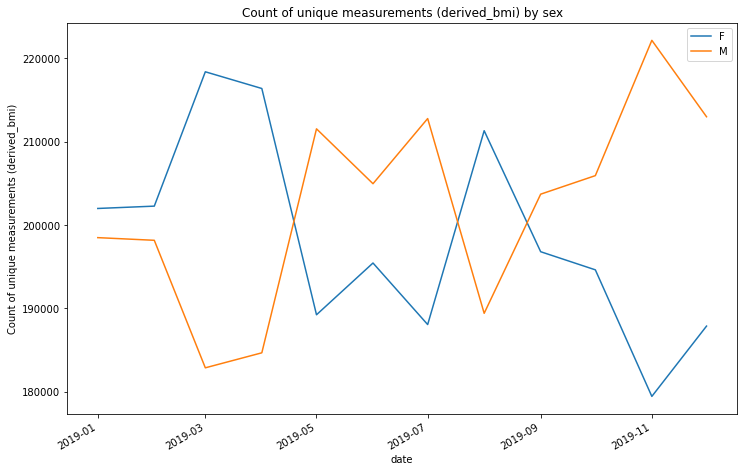

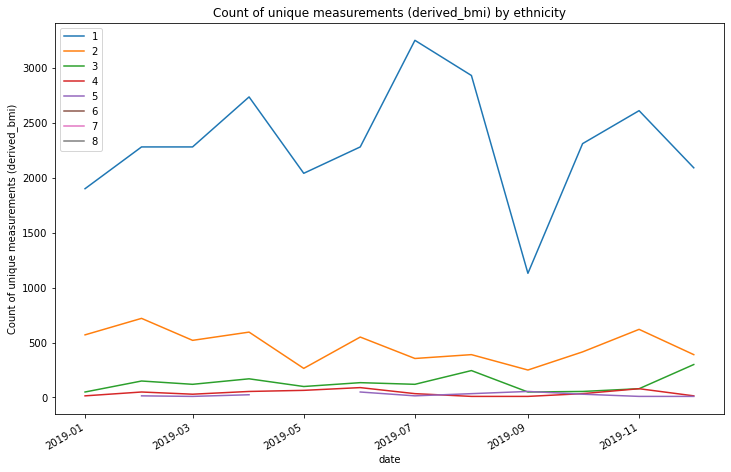

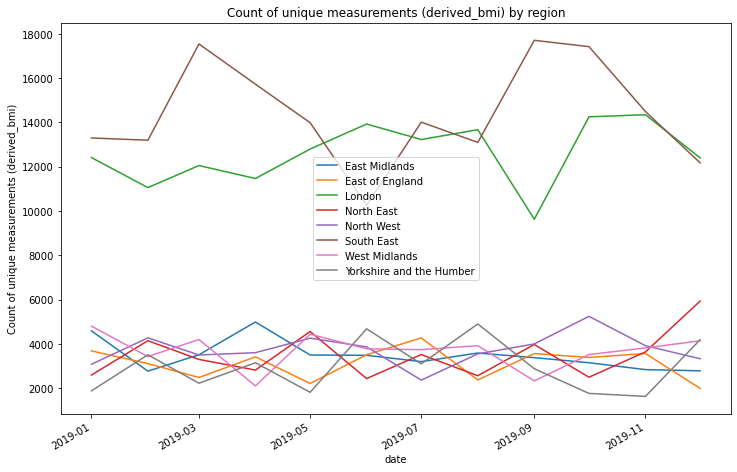

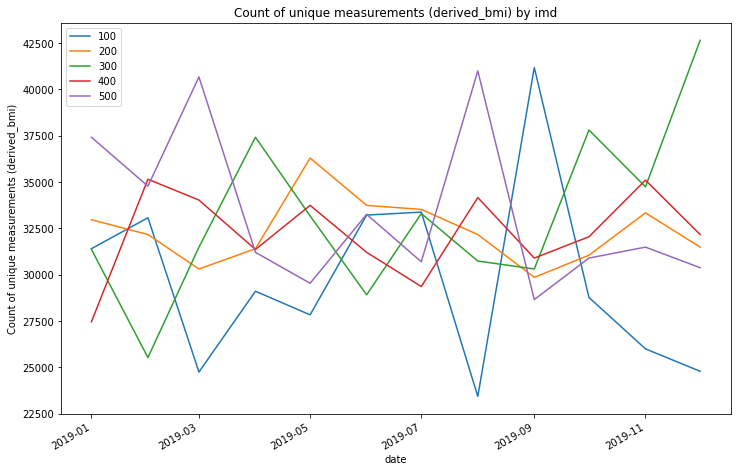

In [14]:
for group in demographic_covariates:
    report_over_time(df_occ, definitions, 'measurement', group)

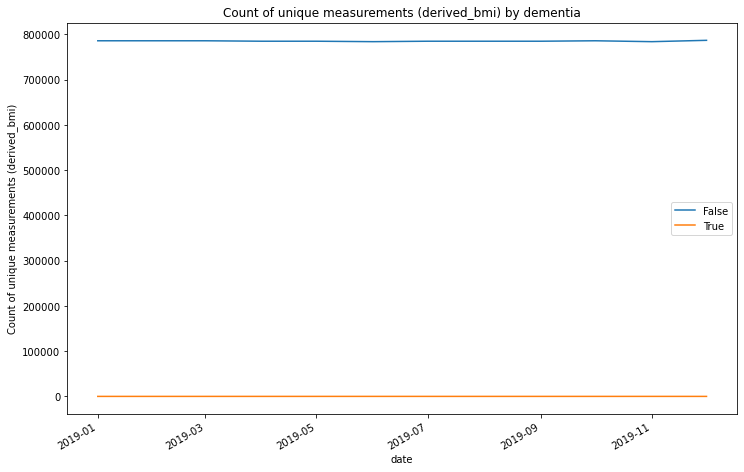

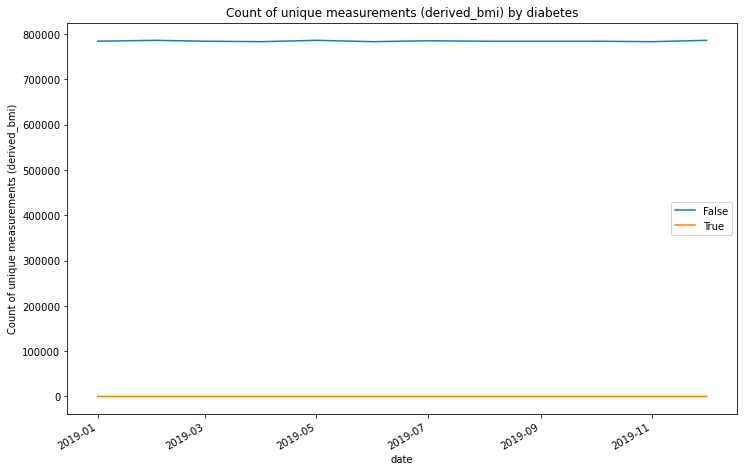

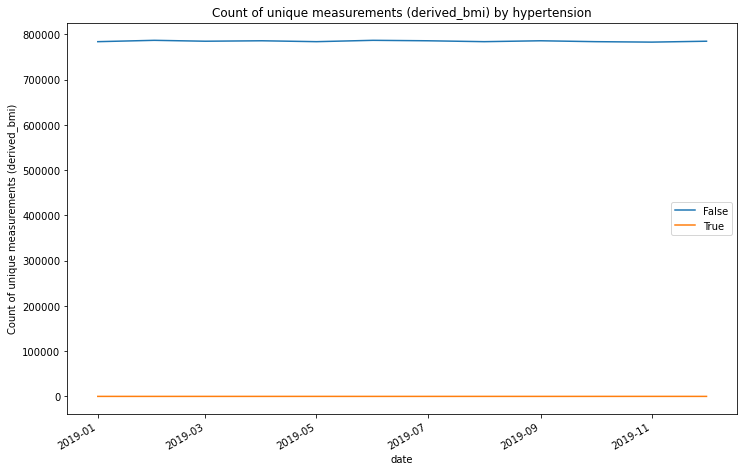

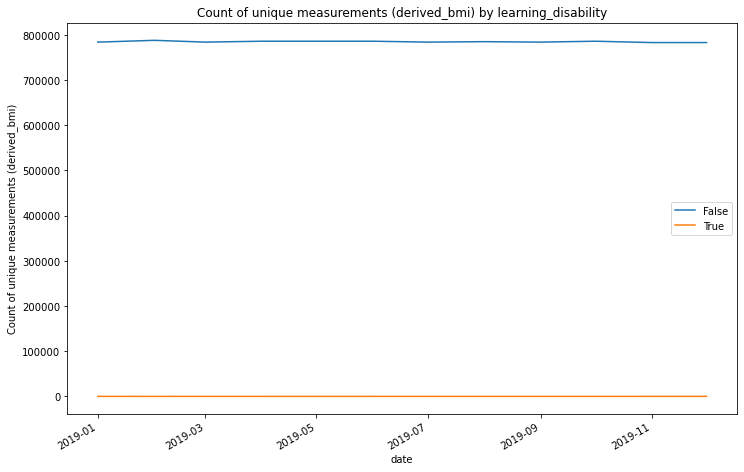

In [15]:
for group in clinical_covariates:
    report_over_time(df_occ, definitions, 'measurement', group)

#### Frequency of Update

Average update frequency of derived_bmi by M:



date_diff_derived_bmi
avg_diff               3.678274
count               4795.000000

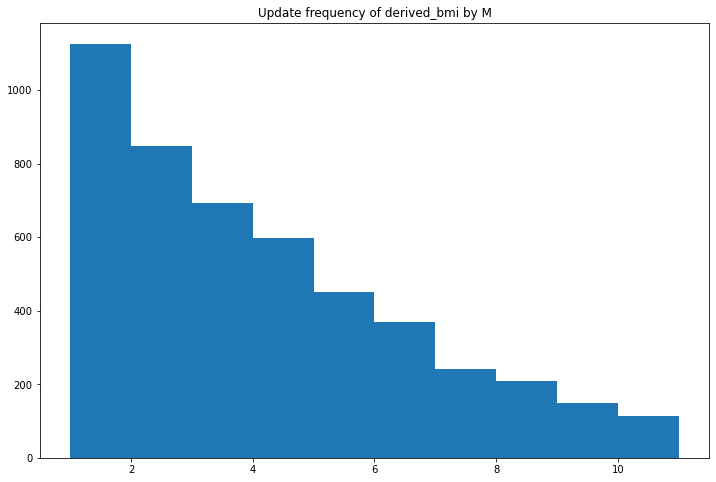

In [16]:
report_update_frequency(df_occ, definitions, time_delta, num_definitions)

Average update frequency by age_band and M:



age_band  avg_diff count
0     0-19  3.660163   615
1    20-29  3.754501   610
2    30-39  3.712397   605
3    40-49  3.770093   535
4    50-59   3.54876   605
5    60-69  3.538705   635
6    70-79  3.631399   585
7      80+  3.825083   605

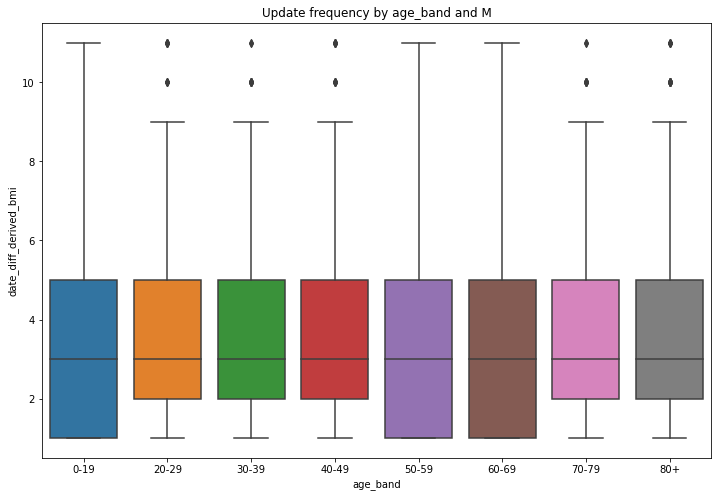

Average update frequency by sex and M:



sex  avg_diff  count
0   F  3.678253   2360
1   M  3.678293   2435

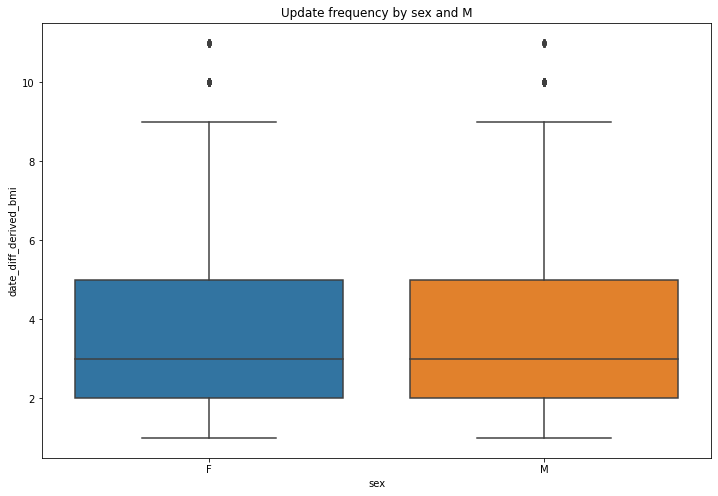

Average update frequency by ethnicity and M:



ethnicity  avg_diff  count
0         1  3.626923  260.0
1         2  3.644628  120.0
2         3  3.645161   60.0
3         4  3.257143   35.0
4         5  2.454545   35.0
5         6  3.555556   10.0
6         7         -      -
7         8         -      -

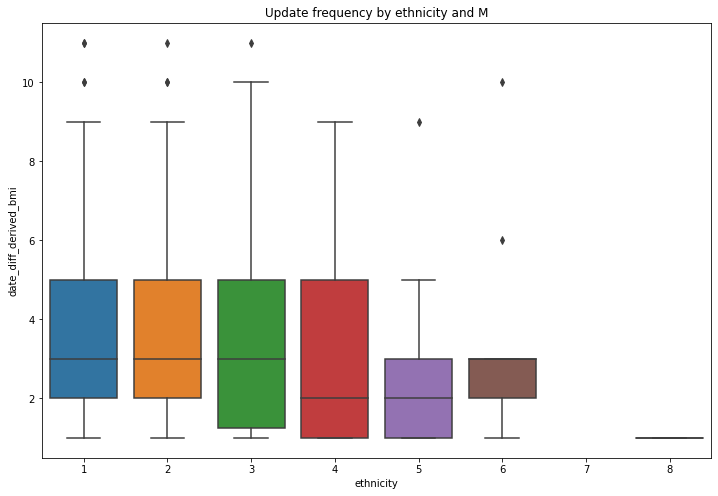

Average update frequency by region and M:



region  avg_diff count
0             East Midlands  3.652027   295
1           East of England  3.637874   300
2                    London  3.680992   605
3                North East  3.629393   315
4                North West  3.670588   340
5                South East  3.674312   655
6             West Midlands   3.73913   300
7  Yorkshire and the Humber  3.596215   315

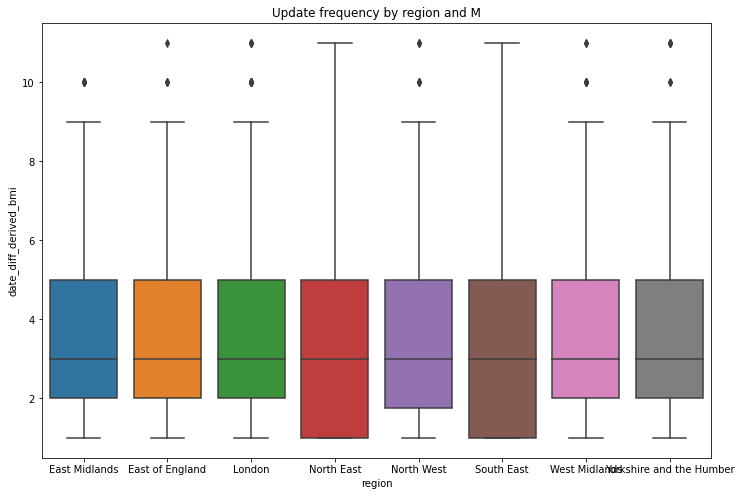

Average update frequency by imd and M:



imd  avg_diff count
0  100  3.648109   950
1  200  3.599581   955
2  300  3.803681   980
3  400  3.633643   970
4  500  3.704136   945

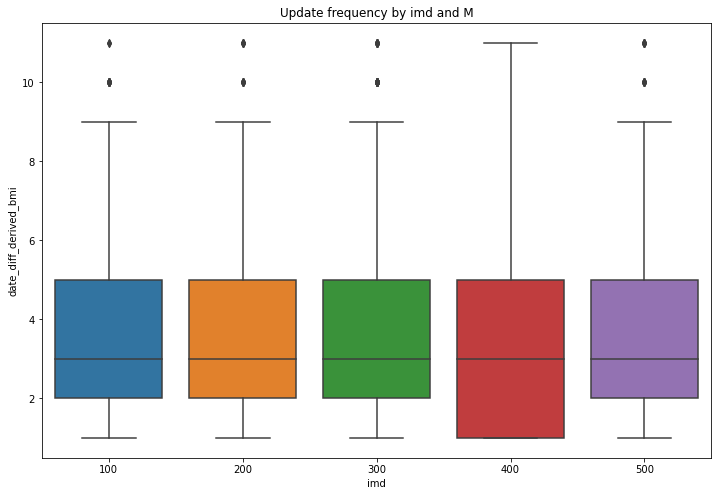

In [17]:
for group in demographic_covariates:
    report_update_frequency(df_occ, definitions, time_delta, num_definitions, group)

Average update frequency by dementia and M:



dementia  avg_diff  count
0     False  3.677955   4755
1      True  3.714286     40

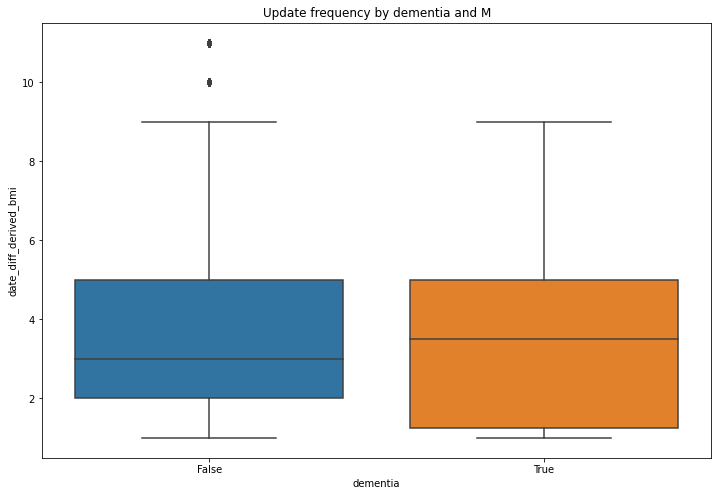

Average update frequency by diabetes and M:



diabetes  avg_diff  count
0     False  3.682824   4745
1      True  3.254902     50

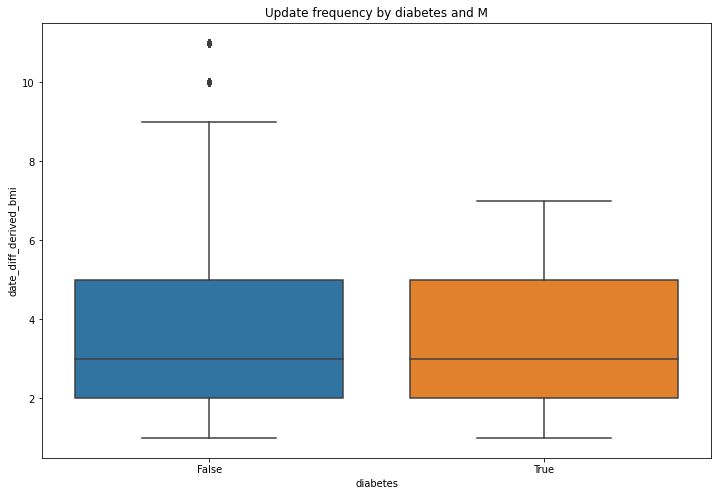

Average update frequency by hypertension and M:



hypertension  avg_diff  count
0         False  3.679916   4755
1          True  3.487805     40

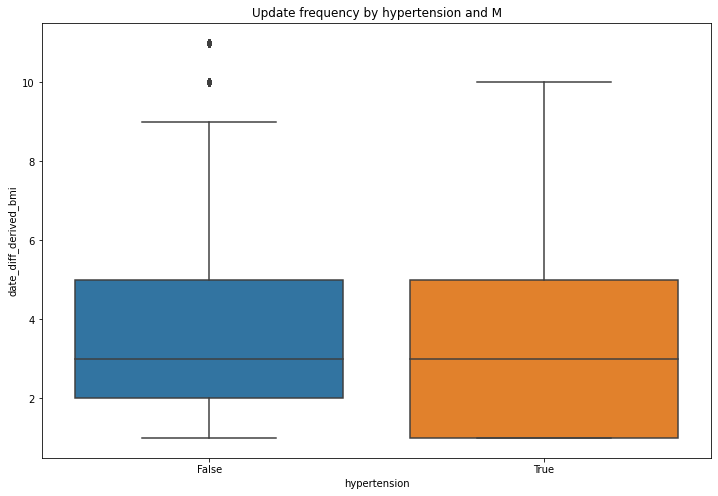

Average update frequency by learning_disability and M:



learning_disability  avg_diff  count
0                False  3.679301   4750
1                 True  3.574468     45

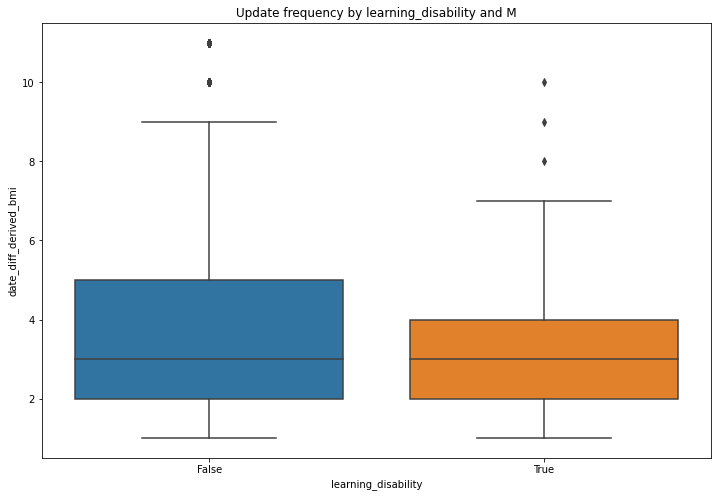

In [18]:
for group in clinical_covariates:
    report_update_frequency(df_occ, definitions, time_delta, num_definitions, group)

### Value

#### Values Out of Range

oor_derived_bmi
count        10.000000
mean          1.480424
pct25         0.683759
pct75         3.029533

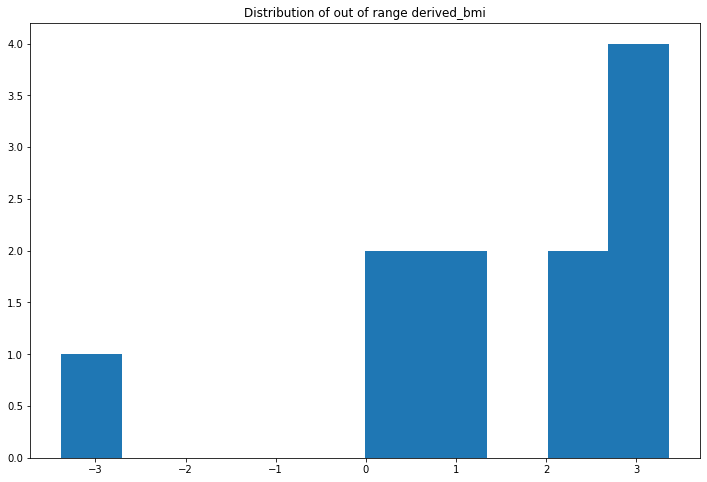

In [19]:
report_out_of_range(df_occ, definitions, min_range, max_range, num_definitions, null)

In [20]:
for group in demographic_covariates:
    report_out_of_range(df_occ, definitions, min_range, max_range, num_definitions, null, group)

count_derived_bmi mean_derived_bmi pct25_derived_bmi  \
age_band                                                        
0-19                     -                -                 -   
20-29                    -                -                 -   
30-39                    -                -                 -   
40-49                    -                -                 -   
50-59                    -                -                 -   
60-69                    -                -                 -   
70-79                    -                -                 -   
80+                      -                -                 -   

         pct75_derived_bmi  
age_band                    
0-19                     -  
20-29                    -  
30-39                    -  
40-49                    -  
50-59                    -  
60-69                    -  
70-79                    -  
80+                      -

Plot redacted due to low counts.


count_derived_bmi mean_derived_bmi pct25_derived_bmi pct75_derived_bmi
sex                                                                       
F                   -                -                 -                 -
M                   -                -                 -                 -

Plot redacted due to low counts.


count_derived_bmi mean_derived_bmi pct25_derived_bmi  \
ethnicity                                                        
1                         -                -                 -   
2                         -                -                 -   
3                         -                -                 -   
4                         -                -                 -   
5                         -                -                 -   
6                         -                -                 -   
7                         -                -                 -   
8                         -                -                 -   

          pct75_derived_bmi  
ethnicity                    
1                         -  
2                         -  
3                         -  
4                         -  
5                         -  
6                         -  
7                         -  
8                         -

Plot redacted due to low counts.


count_derived_bmi mean_derived_bmi pct25_derived_bmi  \
region                                                                          
East Midlands                            -                -                 -   
East of England                          -                -                 -   
London                                   -                -                 -   
North East                               -                -                 -   
North West                               -                -                 -   
South East                               -                -                 -   
West Midlands                            -                -                 -   
Yorkshire and the Humber                 -                -                 -   

                         pct75_derived_bmi  
region                                      
East Midlands                            -  
East of England                          -  
London                                   -  
North East                               -  
North West                               -  
South East                               -  
West Midlands                            -  
Yorkshire and the Humber                 -

Plot redacted due to low counts.


count_derived_bmi mean_derived_bmi pct25_derived_bmi pct75_derived_bmi
imd                                                                       
100                 -                -                 -                 -
200                 -                -                 -                 -
300                 -                -                 -                 -
400                 -                -                 -                 -
500                 -                -                 -                 -

Plot redacted due to low counts.


count_derived_bmi mean_derived_bmi pct25_derived_bmi  \
dementia                                                        
False                 10.0         1.480424          0.683759   
True                     -                -                 -   

         pct75_derived_bmi  
dementia                    
False             3.029533  
True                     -

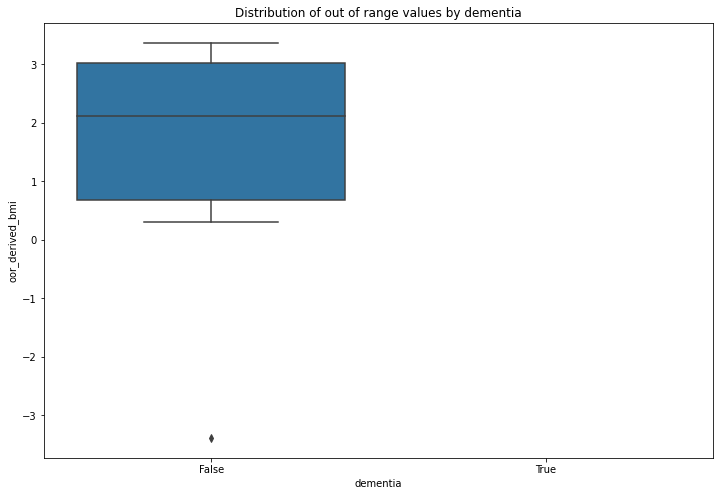

count_derived_bmi mean_derived_bmi pct25_derived_bmi  \
diabetes                                                        
False                 10.0         1.480424          0.683759   
True                     -                -                 -   

         pct75_derived_bmi  
diabetes                    
False             3.029533  
True                     -

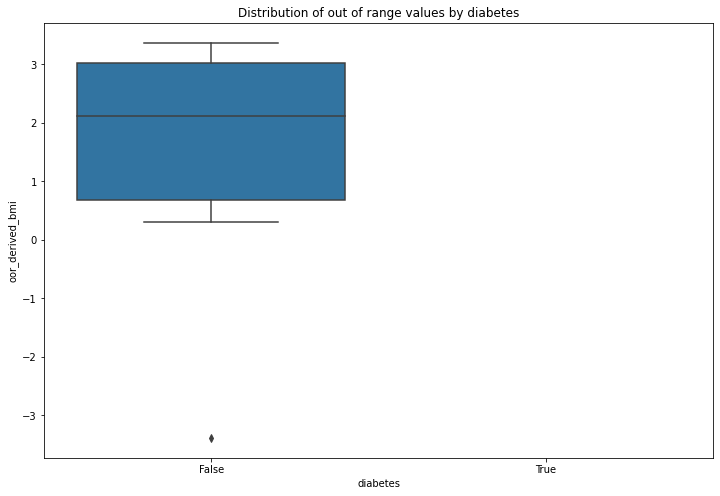

count_derived_bmi mean_derived_bmi pct25_derived_bmi  \
hypertension                                                        
False                     10.0         1.480424          0.683759   
True                         -                -                 -   

             pct75_derived_bmi  
hypertension                    
False                 3.029533  
True                         -

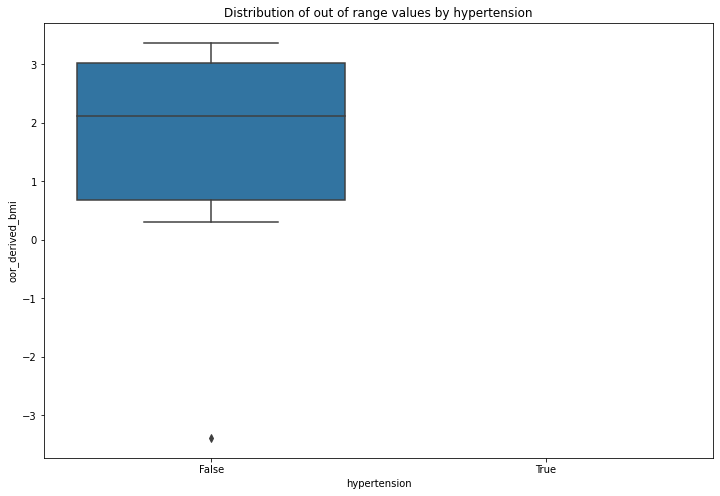

count_derived_bmi mean_derived_bmi pct25_derived_bmi  \
learning_disability                                                        
False                            10.0         1.480424          0.683759   
True                                -                -                 -   

                    pct75_derived_bmi  
learning_disability                    
False                        3.029533  
True                                -

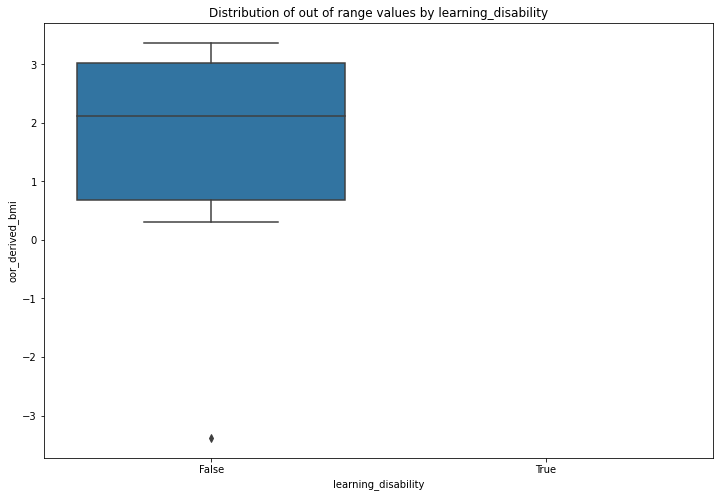

In [21]:
for group in clinical_covariates:
    report_out_of_range(df_occ, definitions, min_range, max_range, num_definitions, null, group)

#### Distributions

Average derived_bmi:



derived_bmi
avg      27.964671
count  9610.000000

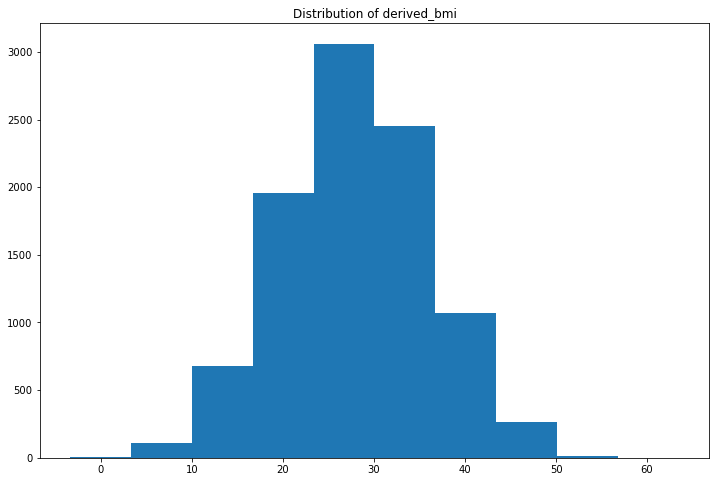

In [22]:
report_distribution(df_occ, definitions, num_definitions)

Averages by age_band:



mean count
age_band                 
0-19      28.011055  1220
20-29     28.148984  1210
30-39     27.730272  1155
40-49     27.837769  1130
50-59     27.808163  1260
60-69     28.286173  1280
70-79     27.907152  1180
80+       27.955389  1180

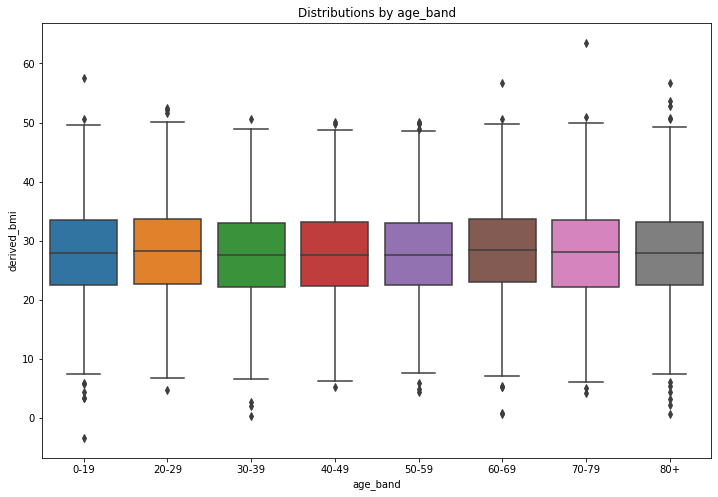

Averages by sex:



mean  count
sex                  
F    28.038996   4805
M    27.890377   4805

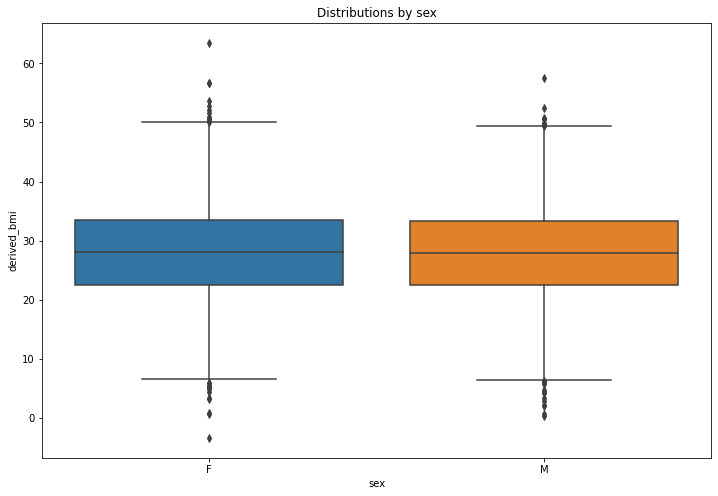

Averages by ethnicity:



mean  count
ethnicity                  
1          28.146736  510.0
2          28.813054  225.0
3          28.783243  115.0
4          26.861961   65.0
5           27.08036   45.0
6           28.50773   15.0
7                  -      -
8                  -      -

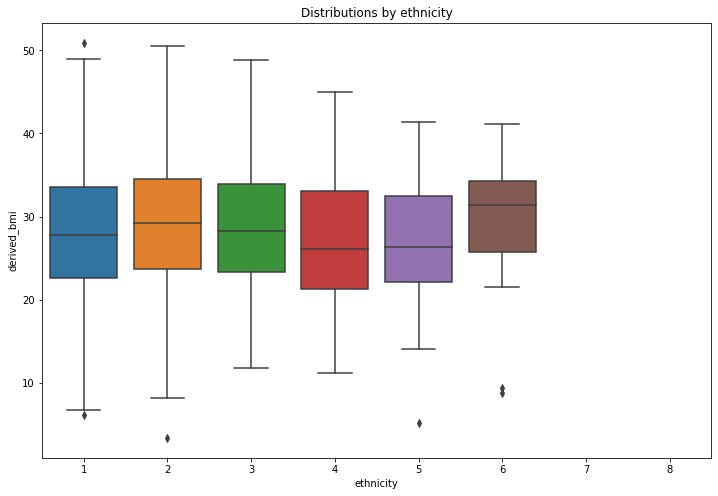

Averages by region:



mean count
region                                   
East Midlands             27.731969   635
East of England            27.11361   605
London                    27.862313  1200
North East                27.950496   615
North West                27.866822   650
South East                28.478273  1280
West Midlands             28.229619   655
Yorkshire and the Humber  28.007455   570

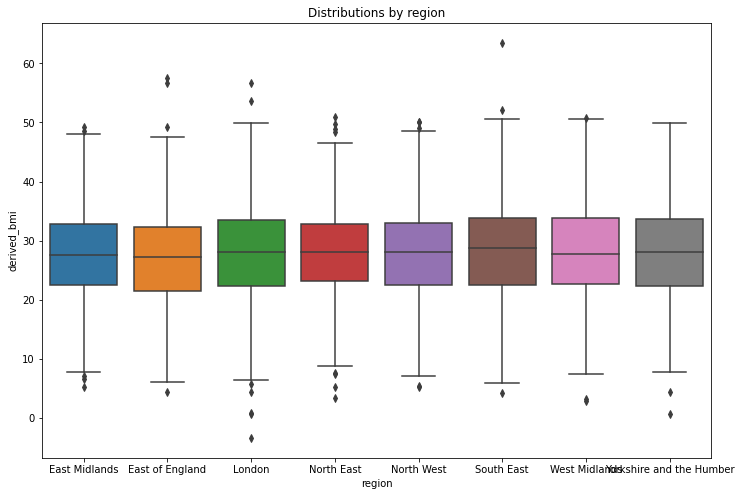

Averages by imd:



mean count
imd                 
100  27.862201  1855
200    28.0517  1935
300  28.170072  1955
400  27.822867  1910
500  27.909156  1960

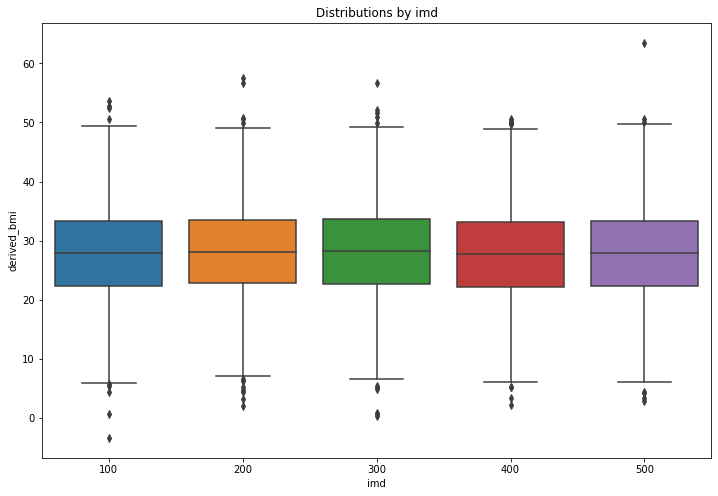

In [23]:
for group in demographic_covariates:
    report_distribution(df_occ, definitions, num_definitions, group)

Averages by dementia:



mean  count
dementia                  
False     27.954307   9520
True      29.037041     90

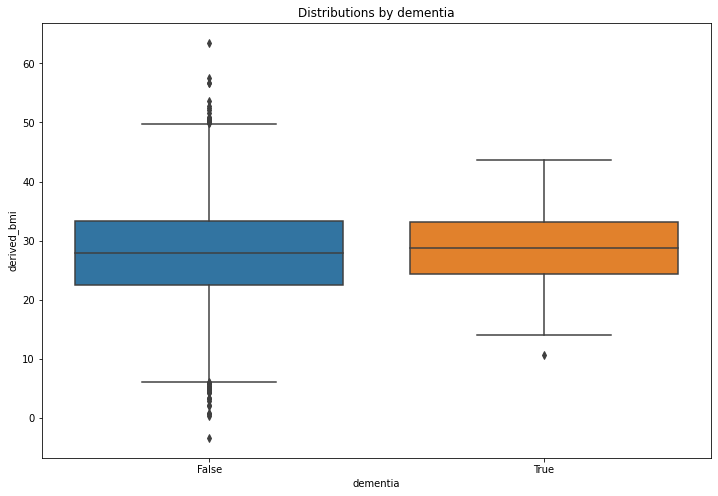

Averages by diabetes:



mean  count
diabetes                  
False     27.964973   9510
True      27.937066    105

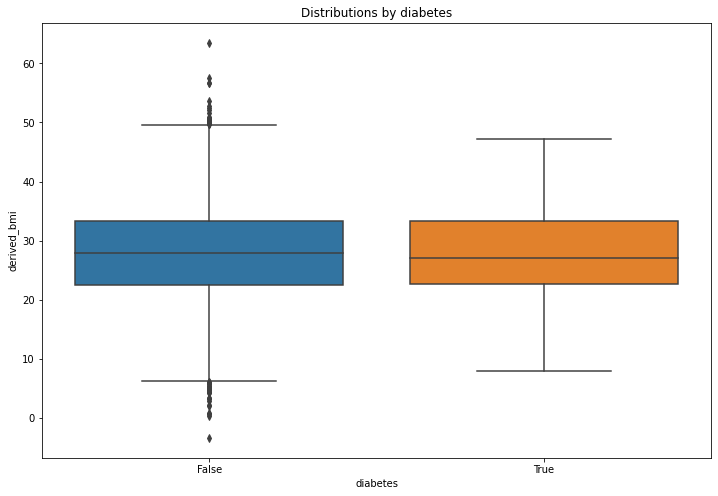

Averages by hypertension:



mean  count
hypertension                  
False         27.966860   9515
True          27.745372     95

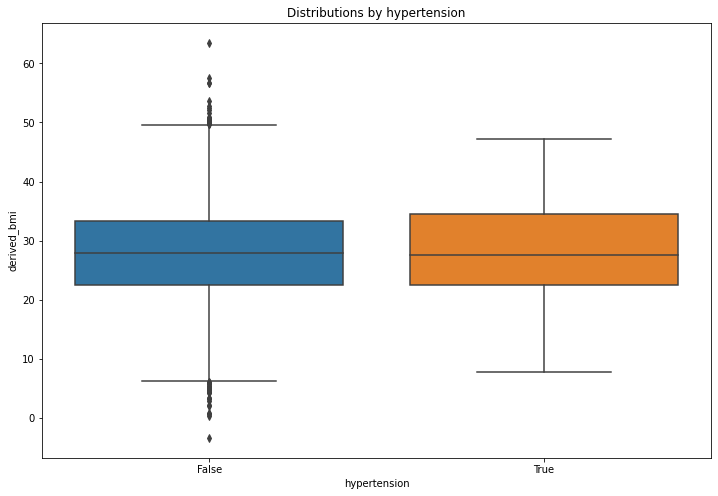

Averages by learning_disability:



mean  count
learning_disability                  
False                27.949890   9515
True                 29.414583     95

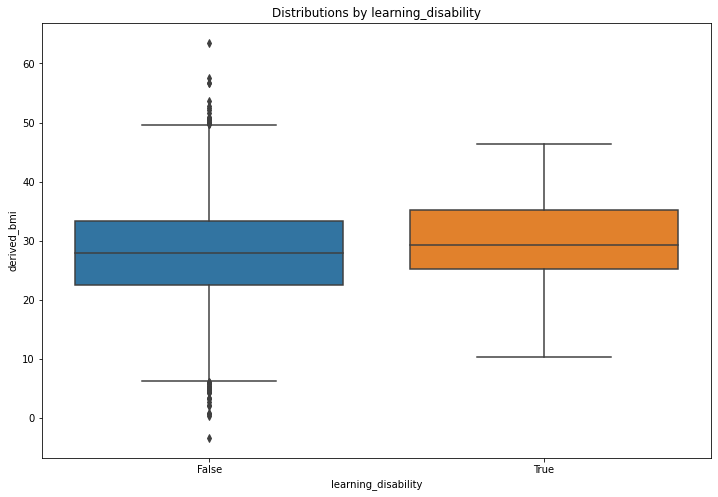

In [24]:
for group in clinical_covariates:
    report_distribution(df_occ, definitions, num_definitions, group)

#### Measures Over Time

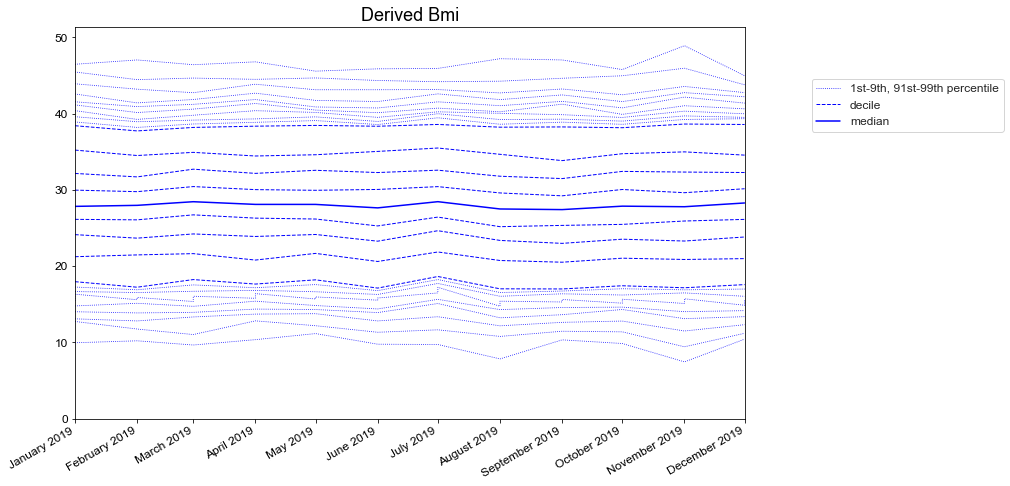

In [25]:
measure_over_time(df_occ, definitions)

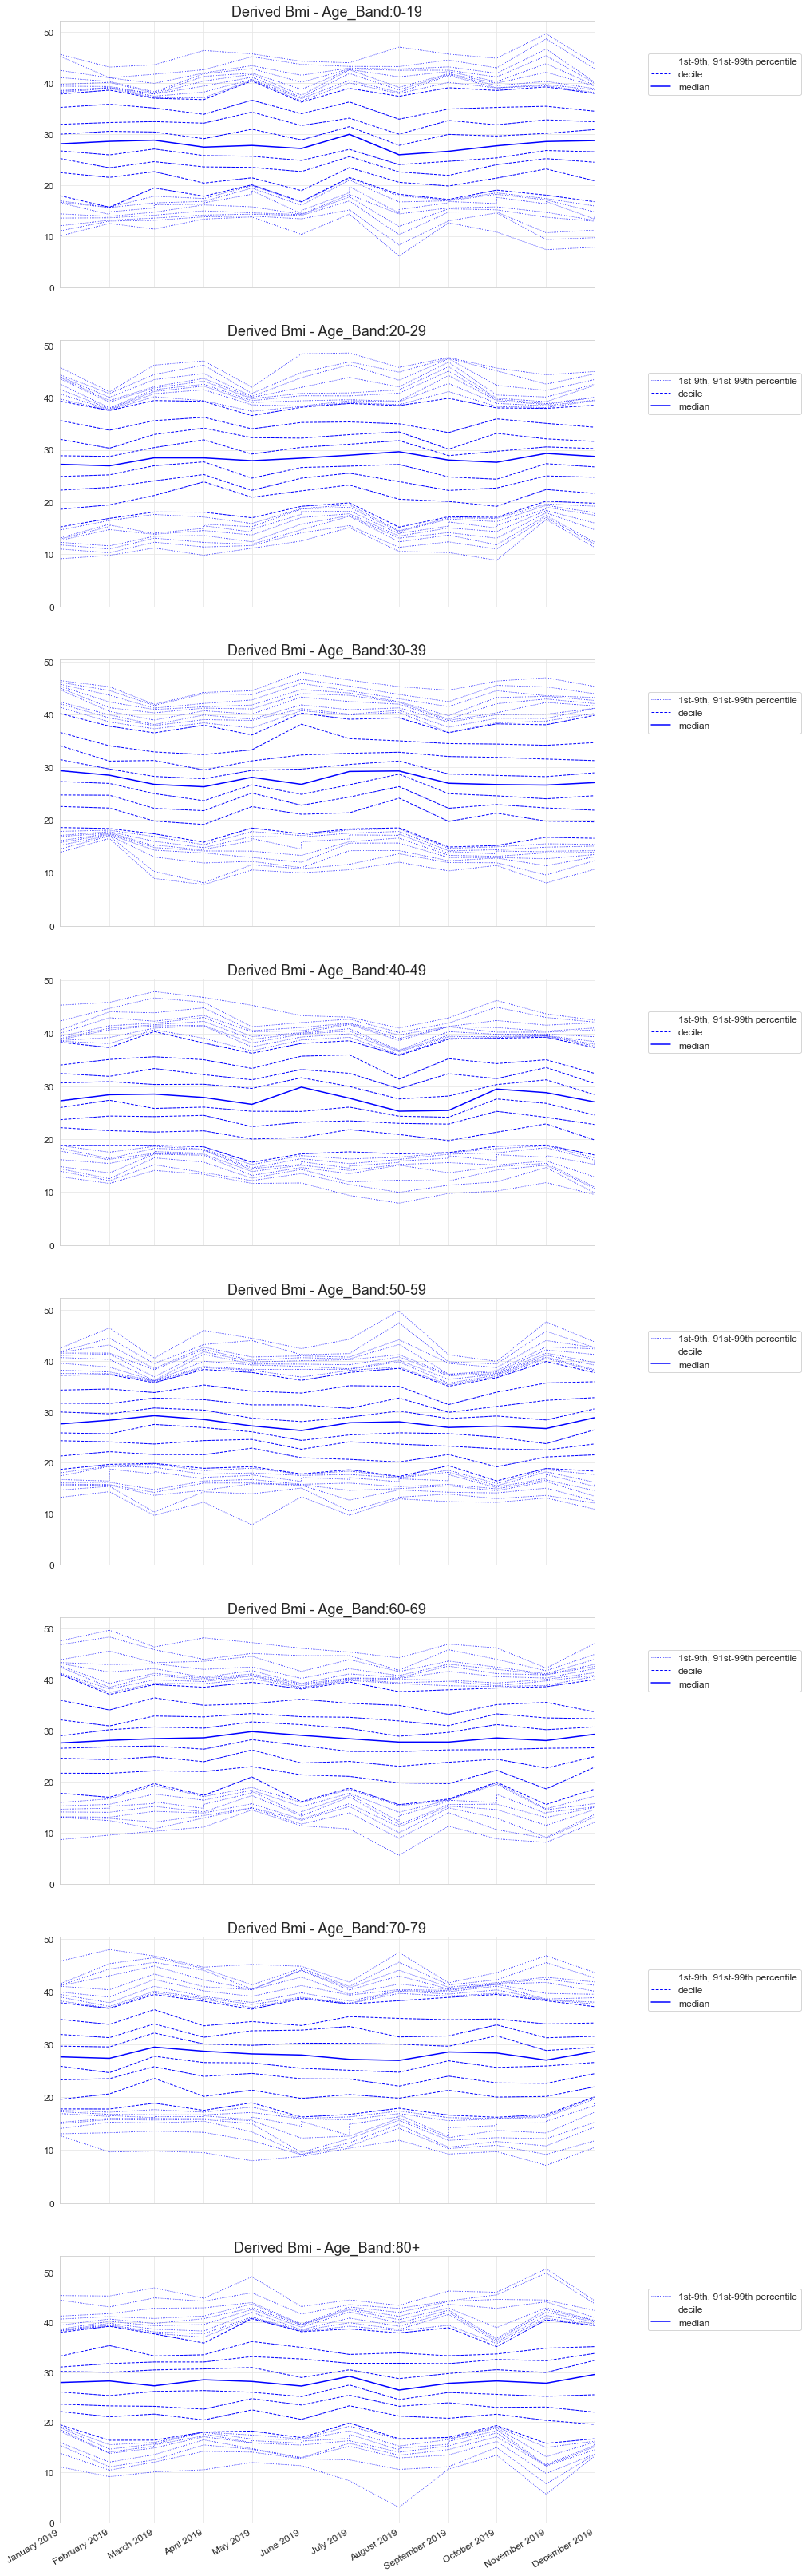

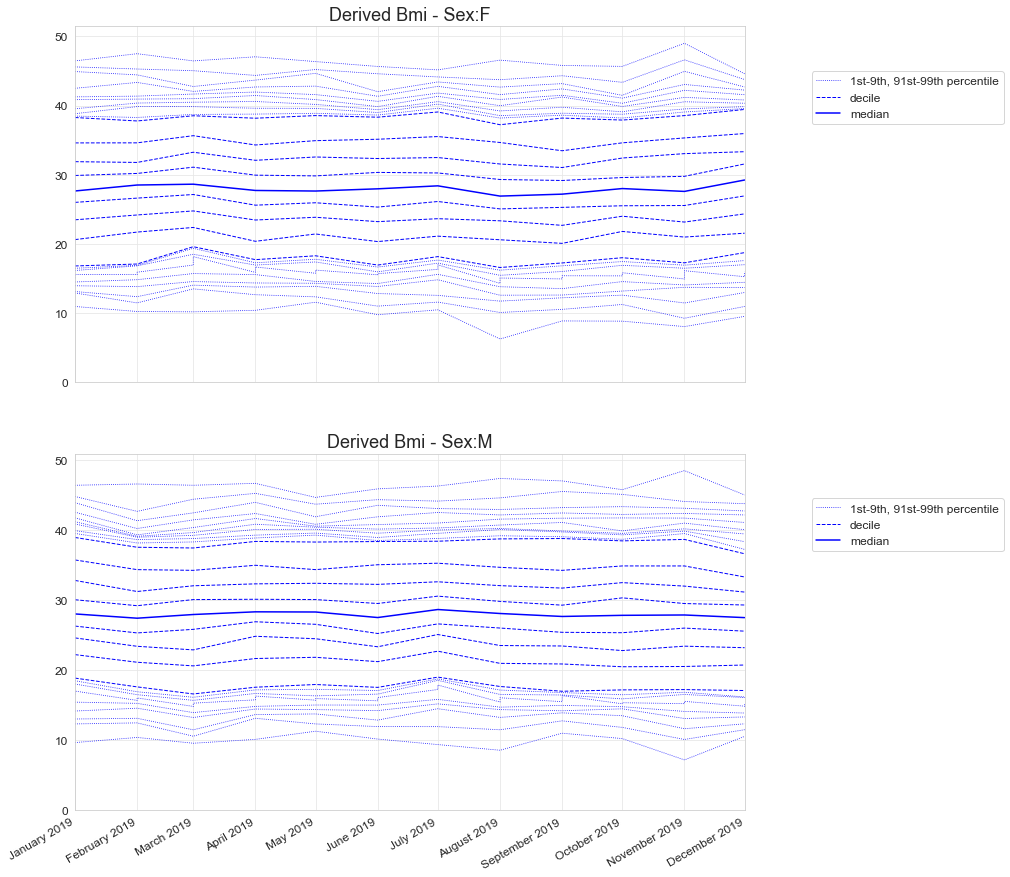

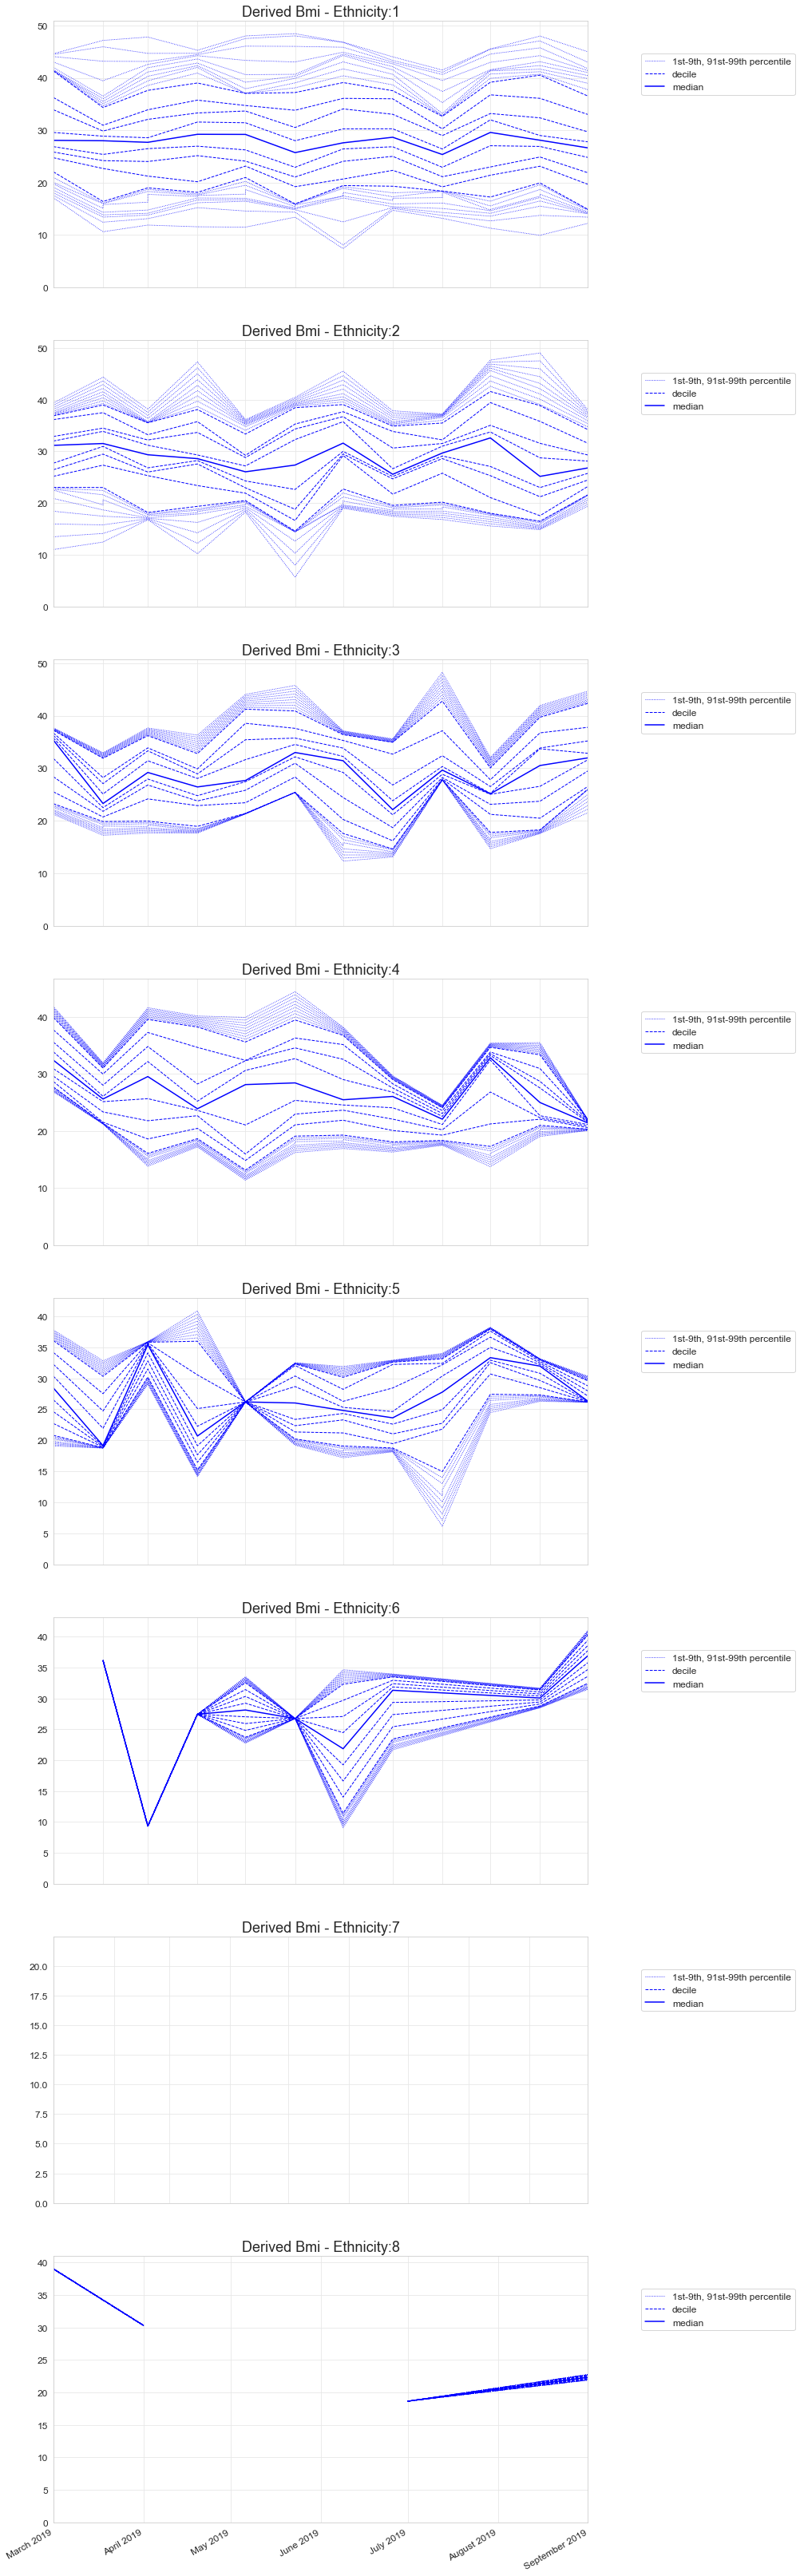

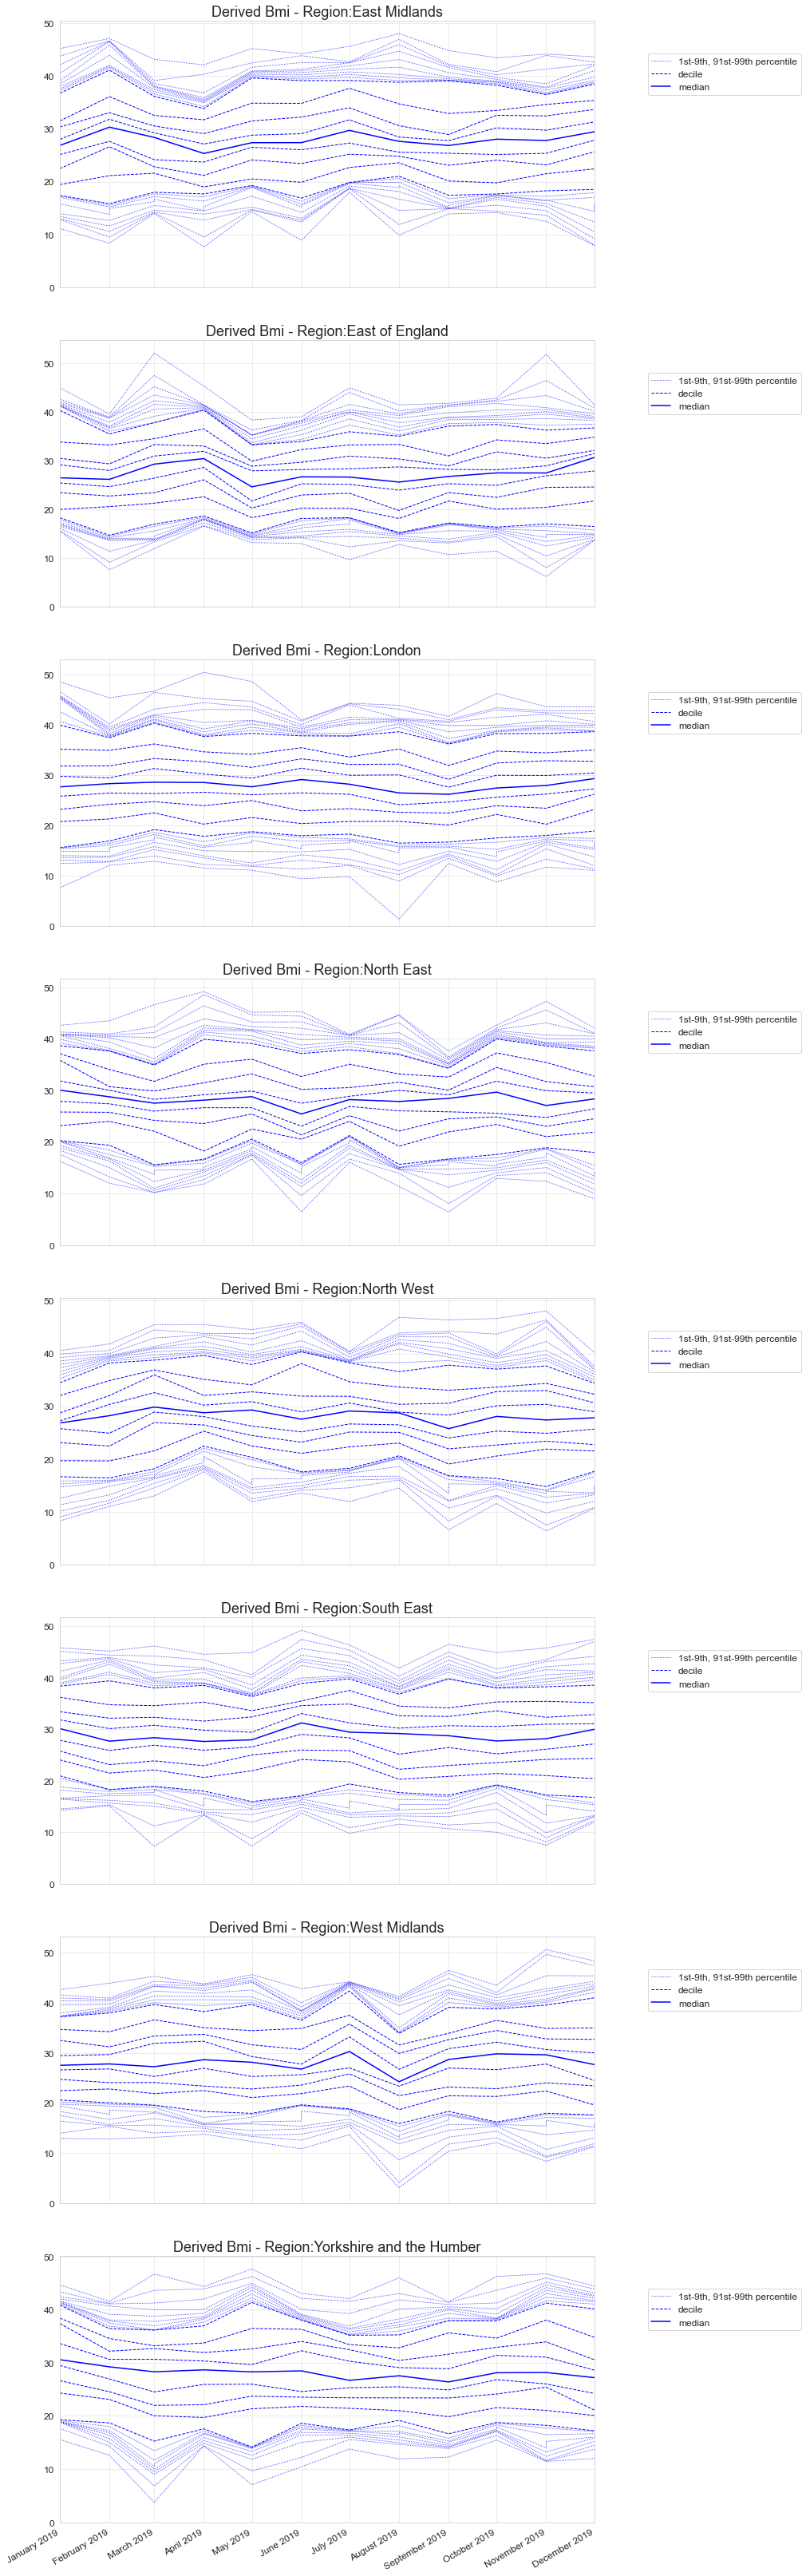

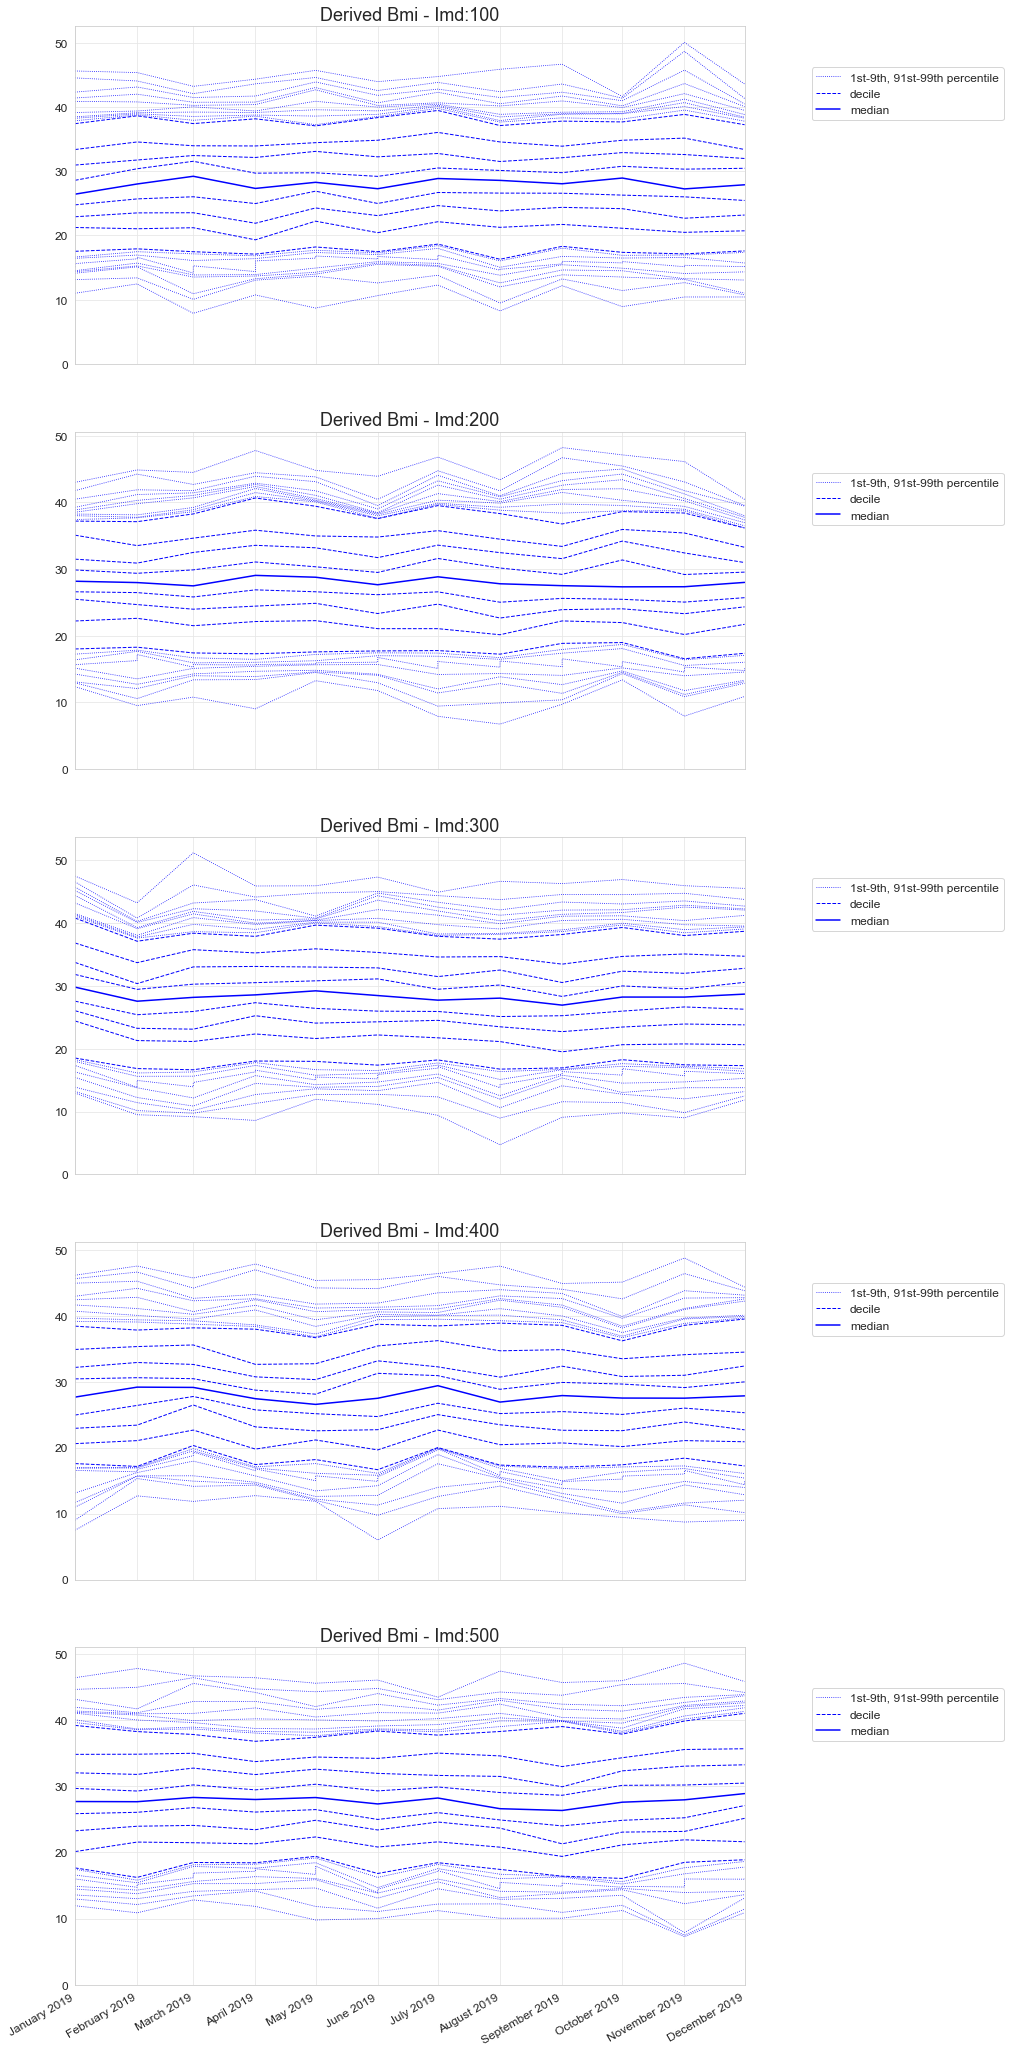

In [26]:
for group in demographic_covariates:
    measure_over_time(df_occ, definitions, group)

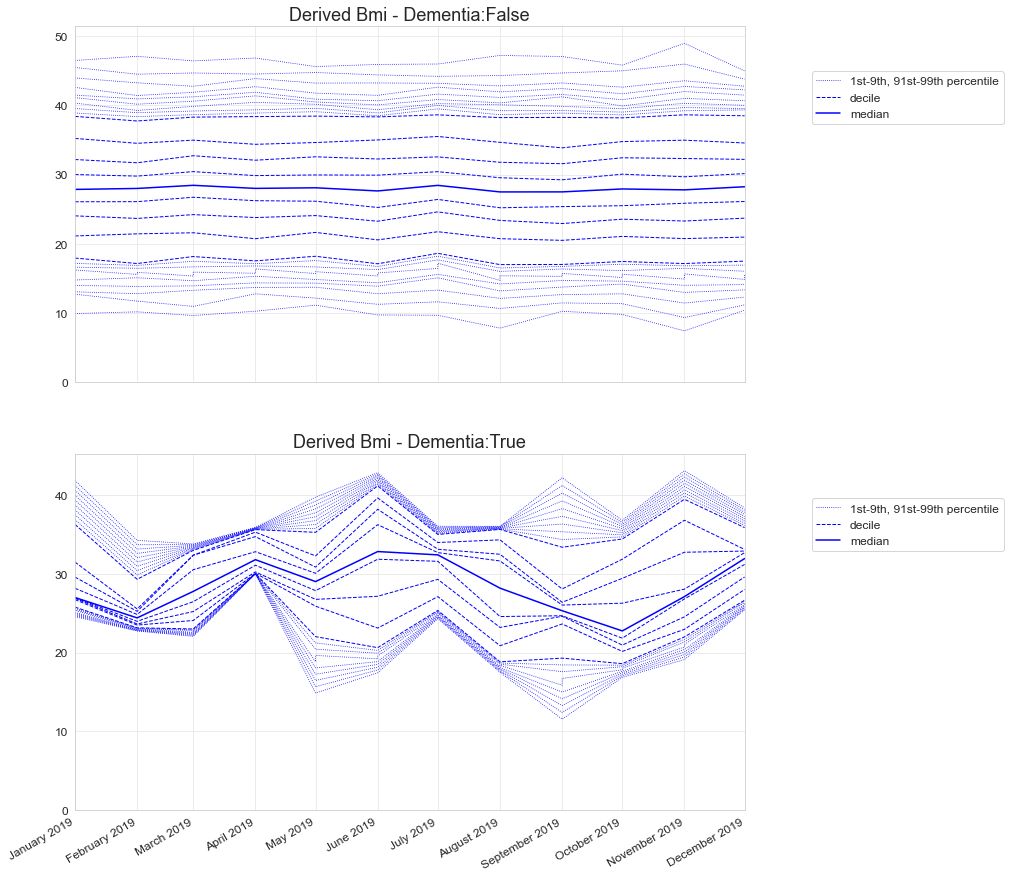

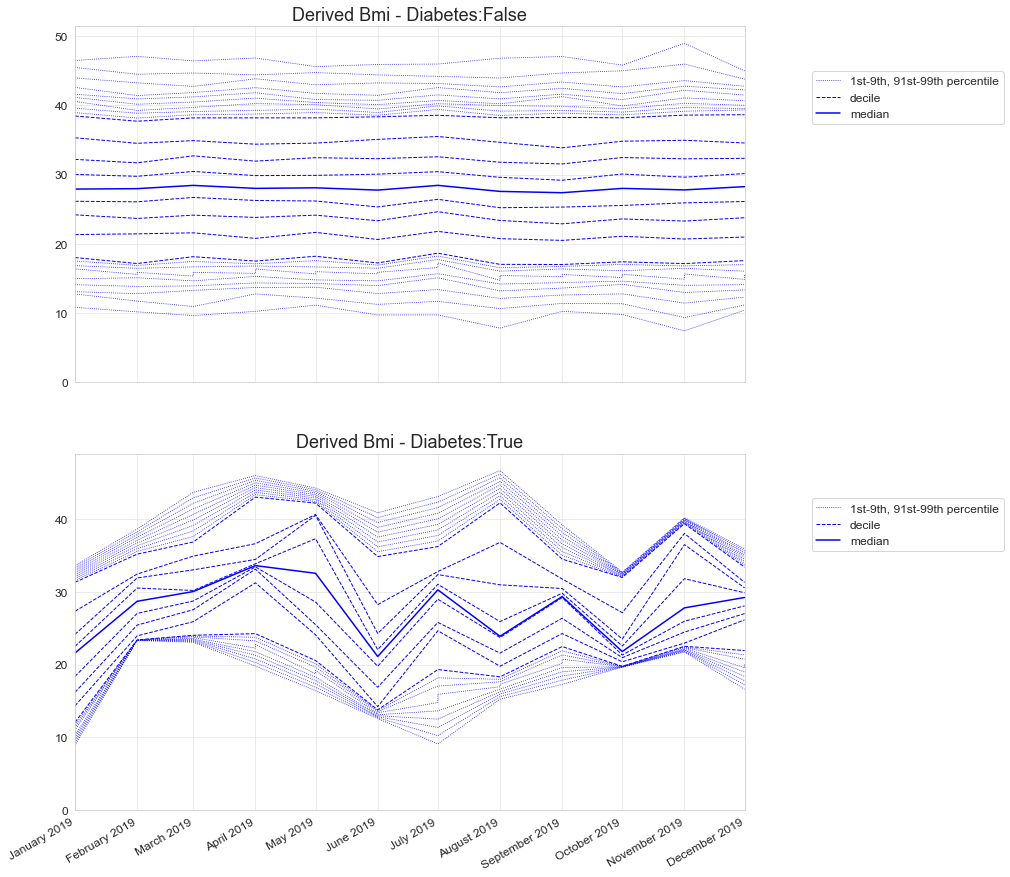

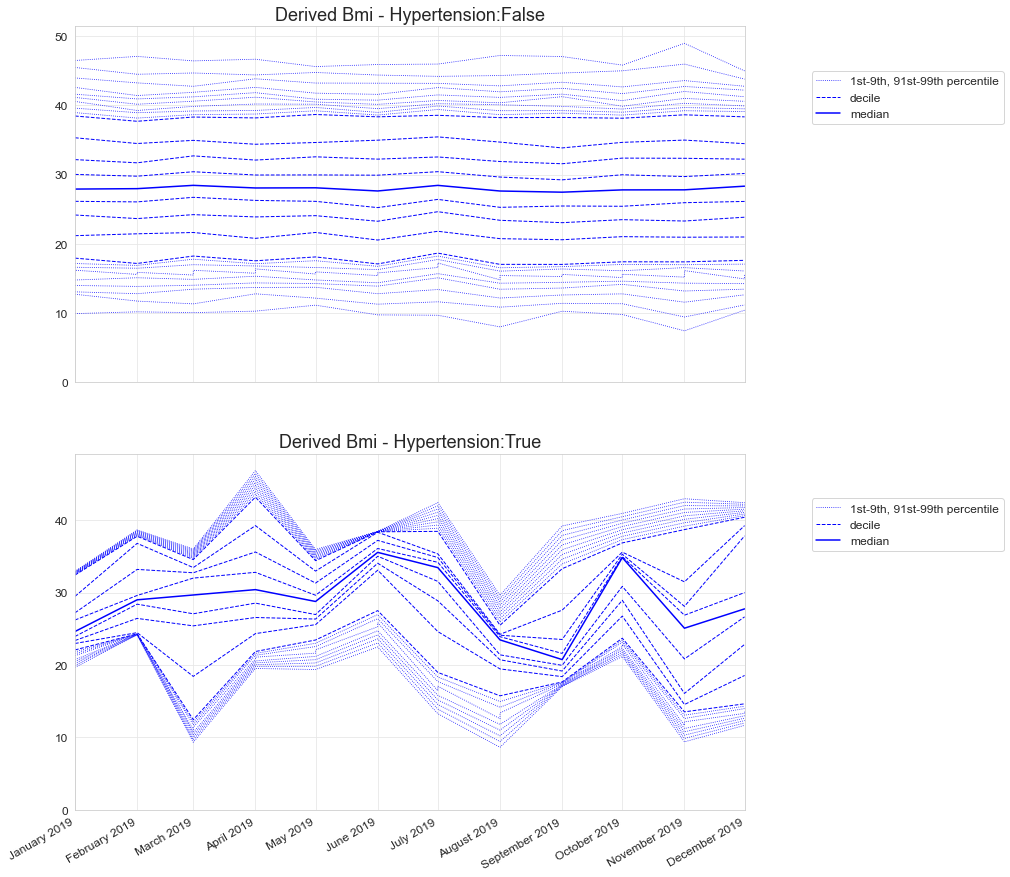

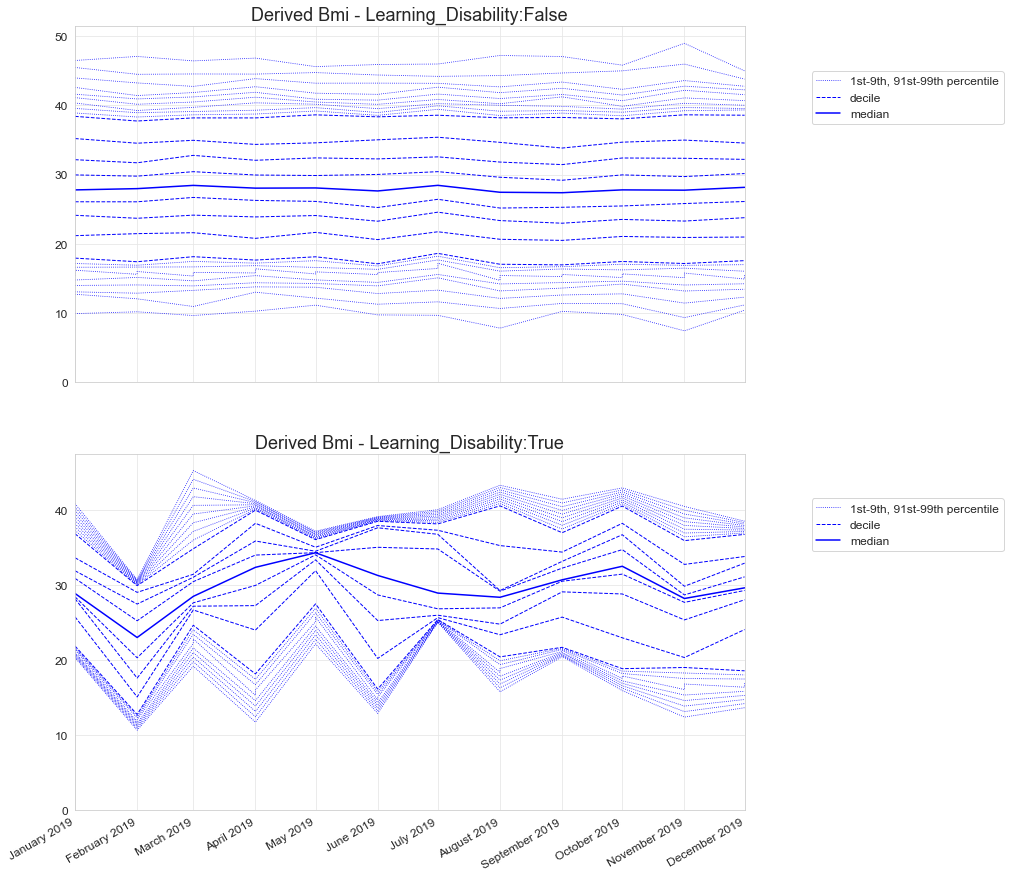

In [27]:
for group in clinical_covariates:
    measure_over_time(df_occ, definitions, group)

In [28]:
# Comparison only runs if more than 1 definition provided
if num_definitions > 1: 
    display(Markdown("""#### Comparison Across Definitions
    """))
    
    compare_value(df_occ, definitions)
    
    for group in demographic_covariates:
        compare_value(df_occ, definitions, group)
    
    for group in clinical_covariates:
        compare_value(df_occ, definitions, group)

## Discussion

<font color='red'>To fill.</font>

The purpose of this live report is to bring a systematic approach to creating, documenting, cross-checking, and sharing variables to improve analyses in OpenSAFELY-TPP. If you have improvements or edits to this report, please contact <font color='red'>owner</font>.